In [62]:
import pandas as pd
df = pd.read_csv("../data/df_baseline-utf8.csv")

## Load Data

In [63]:
print(df.shape)
df.head()

(1091, 18)


,label,artist,album,genre,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube
0,0,Flash Bang Grenada,10 Haters,hiphop,0,0,0,0,0,NaN,NaN,NaN,0,0,0,346,0,0
1,0,Aggro Santos,AggroSantos.com,hiphop,3,0,0,0,0,NaN,NaN,NaN,63771,27415,596562,4675,585,7975
2,0,AKA,Altar Ego,hiphop,4,0,0,1,2,NaN,NaN,NaN,38958,0,0,22298,0,3643764
3,0,Shlohmo,Bad Vibes,hiphop,0,0,0,0,67,NaN,NaN,7.8,91790,59340,209063,141268,283539,0
4,0,Glasses Malone,Beach Cruiser,hiphop,4,0,0,0,4,NaN,NaN,NaN,68417,48745,93741,16402,0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 18 columns):
label             1091 non-null int64
artist            1091 non-null object
album             1091 non-null object
genre             1091 non-null object
single_count      1091 non-null int64
freq_billboard    1091 non-null int64
freq_genius       1091 non-null int64
freq_theSource    1091 non-null int64
freq_xxl          1091 non-null int64
rating_AOTY       61 non-null float64
rating_meta       324 non-null float64
rating_pitch      220 non-null float64
twitter           1091 non-null int64
instagram         1091 non-null int64
facebook          1091 non-null int64
spotify           1091 non-null int64
soundcloud        1091 non-null int64
youtube           1091 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 153.5+ KB


**Note**
- 온라인매체 기사의 양, 평론가 평점은 Null Value가 있기 때문에, 당장 Decision Tree를 통해 학습을 시킬 수 없어, Feature에서 제외를 한다.

## Data Preparation for Modeling

#### 장르 `hiphop`, `R&B`, `Soul`, `Funk`, `Pop`

In [65]:
df = pd.get_dummies(df, columns=['genre'])

In [66]:
df.columns

Index(['label', 'artist', 'album', 'single_count', 'freq_billboard',
       'freq_genius', 'freq_theSource', 'freq_xxl', 'rating_AOTY',
       'rating_meta', 'rating_pitch', 'twitter', 'instagram', 'facebook',
       'spotify', 'soundcloud', 'youtube', 'genre_Soul', 'genre_funk',
       'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul'],
      dtype='object')

#### Split train & test data 

In [67]:
feature_names = ['single_count', 
                 'freq_billboard', 'freq_genius', 'freq_theSource', 'freq_xxl',
                 'twitter', 'instagram', 'facebook',
                 'spotify', 'soundcloud', 'youtube',
                 'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul']
dfX = df[feature_names].copy()
dfy = df['label'].copy()

In [68]:
dfX.tail()

,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,spotify,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul
1086,0,0,0,200,9,3708,7855,10703,15130,1043,14066,0,0,1,0,0
1087,3,2,0,0,9,600,286554,355355,329507,21954,1728617,0,0,1,0,0
1088,2,0,0,0,0,1913,23837,9187,16544,756,743,0,0,1,0,0
1089,6,2,0,0,0,11571,27192,27615,60983,6295,43228,0,0,1,0,0
1090,4,1,0,0,213,19974,27428,60138,37009,2341,22642,0,0,1,0,0


In [69]:
dfy.tail()

1086    0
1087    0
1088    0
1089    0
1090    0
Name: label, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7).fit(X_train, y_train)

In [72]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=dfX.columns)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(dfX.columns)
    plt.ylabel(dfy.columns)
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

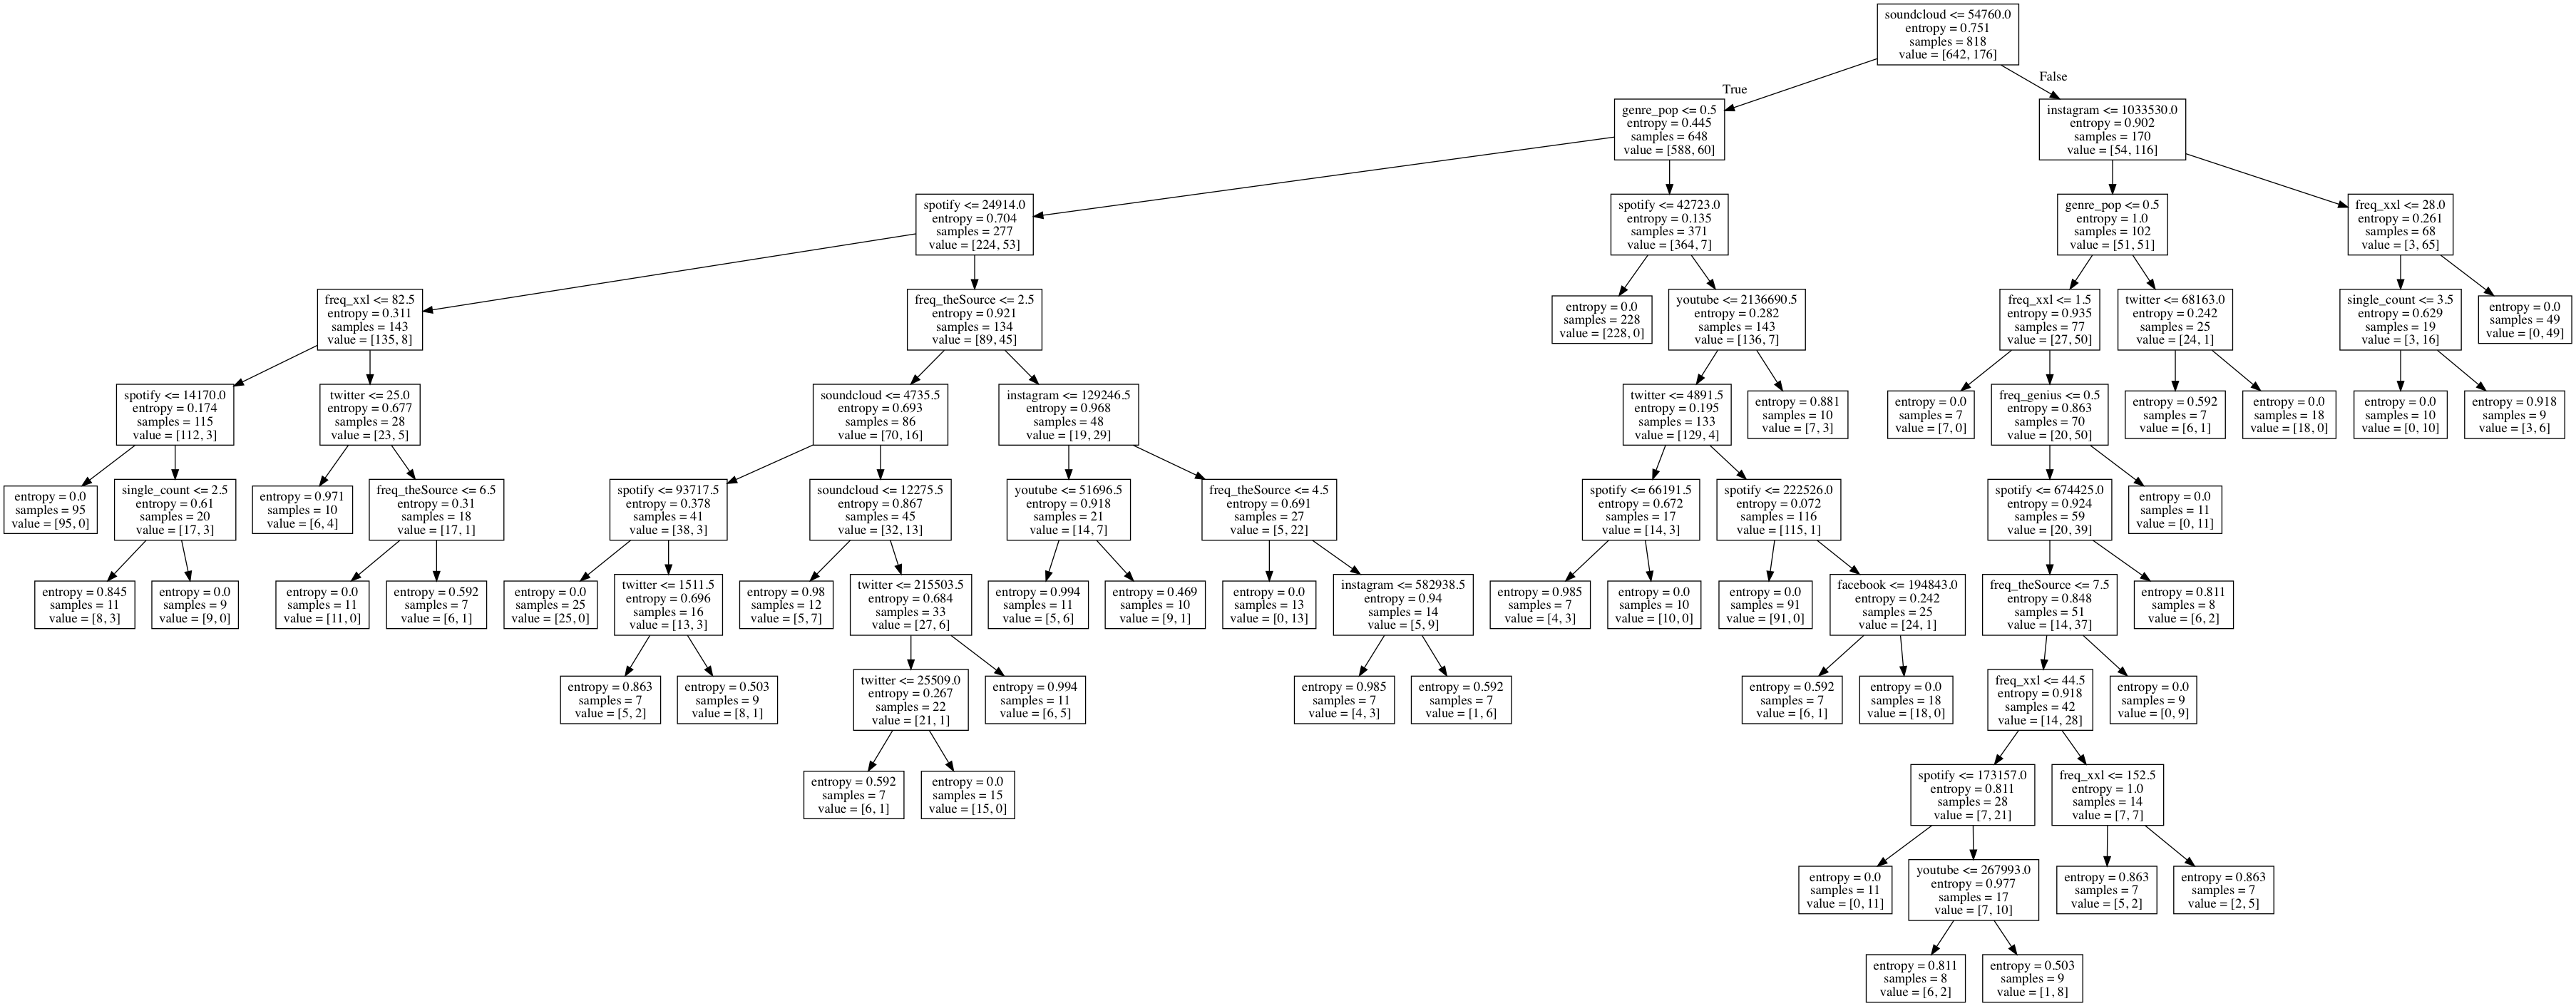

In [73]:
draw_decision_tree(model)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_train, model.predict(X_train))

array([[625,  17],
       [ 35, 141]])

In [76]:
confusion_matrix(y_test, model.predict(X_test))

array([[202,  20],
       [ 17,  34]])

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       642
          1       0.89      0.80      0.84       176

avg / total       0.94      0.94      0.94       818



In [78]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.91      0.92       222
          1       0.63      0.67      0.65        51

avg / total       0.87      0.86      0.87       273



In [79]:
for name, importance in zip(dfX.columns, model.feature_importances_):
    print(name, importance)

single_count 0.014156664628780312
freq_billboard 0.0
freq_genius 0.012701533295113247
freq_theSource 0.06207219114225441
freq_xxl 0.05711990793666008
twitter 0.042615824140718246
instagram 0.09503103781342913
facebook 0.004115702474244236
spotify 0.1435934615764757
soundcloud 0.3922993378297969
youtube 0.03191522965586803
genre_funk 0.0
genre_hiphop 0.0
genre_pop 0.14437910950665966
genre_rnb 0.0
genre_soul 0.0


In [80]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

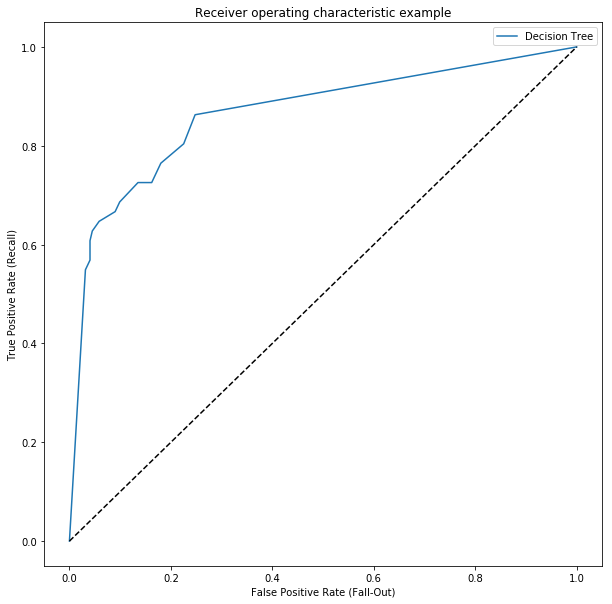

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [82]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8650856739092033

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
model2 = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=10, 
                                min_samples_split=5 , min_samples_leaf=5
                                ).fit(X_train, y_train)

In [85]:
confusion_matrix(y_train, model2.predict(X_train))

array([[626,  16],
       [ 37, 139]])

In [86]:
confusion_matrix(y_test, model2.predict(X_test))

array([[212,  10],
       [ 18,  33]])

In [87]:
print(classification_report(y_train, model2.predict(X_train)))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       642
          1       0.90      0.79      0.84       176

avg / total       0.93      0.94      0.93       818



In [88]:
print(classification_report(y_test, model2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.95      0.94       222
          1       0.77      0.65      0.70        51

avg / total       0.89      0.90      0.89       273



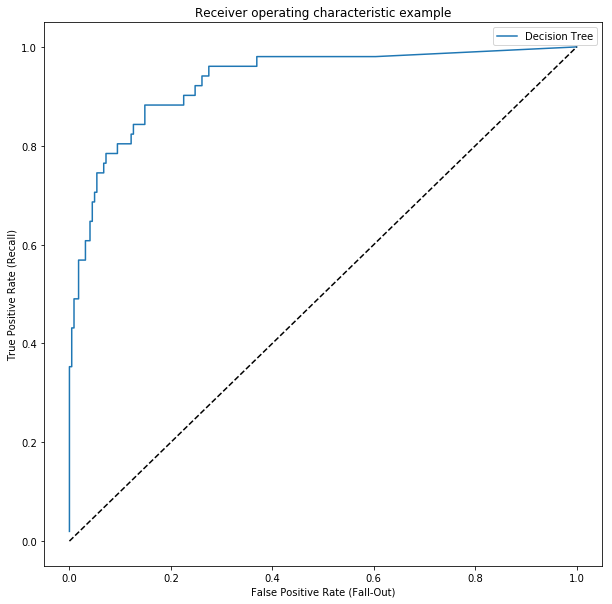

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [92]:
auc(fpr, tpr)

0.9319908143437555

In [52]:
for name, importance in zip(dfX.columns, model2.feature_importances_):
    print(name, importance)

single_count 0.042957623743292525
twitter 0.11625616350894319
instagram 0.14050915227171853
facebook 0.02947923053883229
spotify 0.12252744815305036
soundcloud 0.3112911451427147
youtube 0.06049780840925134
genre_funk 0.0
genre_hiphop 0.030821030870197053
genre_pop 0.13318437440038575
genre_rnb 0.012476022961614269
genre_soul 0.0


# ExtraTree

In [93]:
from sklearn.ensemble import ExtraTreesClassifier

In [94]:
model3 = ExtraTreesClassifier(criterion='entropy', n_estimators=10, max_depth=10, 
                                min_samples_split=5 , min_samples_leaf=5).fit(X_train, y_train)

In [95]:
confusion_matrix(y_train, model3.predict(X_train))

array([[633,   9],
       [ 92,  84]])

In [96]:
confusion_matrix(y_test, model3.predict(X_test))

array([[210,  12],
       [ 30,  21]])

In [97]:
print(classification_report(y_train, model3.predict(X_train)))

             precision    recall  f1-score   support

          0       0.87      0.99      0.93       642
          1       0.90      0.48      0.62       176

avg / total       0.88      0.88      0.86       818



In [98]:
print(classification_report(y_test, model3.predict(X_test)))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91       222
          1       0.64      0.41      0.50        51

avg / total       0.83      0.85      0.83       273



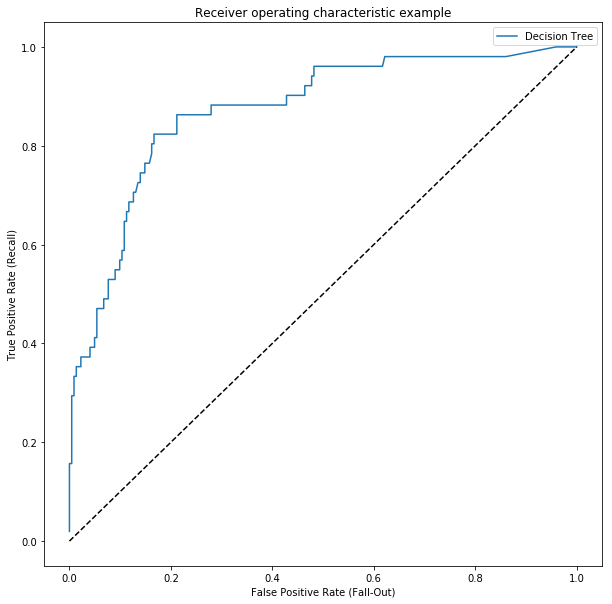

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [100]:
auc(fpr, tpr)

0.8720632397102985

우리는 Recall (Sensitivity) $ \dfrac{TP}{TP+FN} $ 가 매우 중요하다


**Precision의 경우**
- False Positive :
    - 무시해도 될 신인인데 굳이 컨텐츠를 생산했다. 
        - 뭐 어때, 에너지 이상한데 소비하긴 했지만 굿.

**Recall의 경우**
- False Negative:
    - 빠르게 컨텐츠를 생산해야 하는 신인인데, 걸러버렸다.
        - 다른 매체에 선수를 뺐길 수 있다. 유저 유입이 적어짐.
        - 다른 부가 한국에서의 공연 에이전시 계약, 머천다이즈 등 부가적인 기회들을 놓쳐버릴 수 있음.
        - 굉.장.히 중요한 부분 !
        
     

# GridSearch : Random Forest

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [116]:
RandomForestClassifier.get_params(model2)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [117]:
# pipe_rfc = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier())])

rfc = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
     'class_weight': [None],
    'criterion': ['entropy'],
    'max_depth': [3, 5, 10, 20, 30, 40, 50],
    'max_features': ['auto'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'min_impurity_split': [None],
    'min_samples_leaf': [2, 3, 4, 5, 8, 10, 12],
    'min_samples_split': [2, 3, 4, 5],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [10, 15, 20, 30, 50, 100],
    'random_state': [None],
     'oob_score': [False],
     'verbose': [0],
     'warm_start': [False]
}


gs = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='recall', cv=10, n_jobs=1)


In [118]:
%%time
gs_result = gs.fit(dfX, dfy)

CPU times: user 16min 25s, sys: 5.83 s, total: 16min 31s
Wall time: 16min 56s


In [105]:
# gs2 = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='precision', cv=10, n_jobs=2)

In [119]:
gs.best_score_

0.6542244668016797

In [120]:
gs.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Apply Best Parameter from Grid Search

In [146]:
model4 = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=10, 
                                min_samples_split=2, min_samples_leaf=8).fit(X_train, y_train)

In [147]:
confusion_matrix(y_train, model4.predict(X_train))

array([[629,  13],
       [ 42, 134]])

In [148]:
print(classification_report(y_train, model4.predict(X_train)))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       642
          1       0.91      0.76      0.83       176

avg / total       0.93      0.93      0.93       818



In [149]:
confusion_matrix(y_test, model4.predict(X_test))

array([[211,  11],
       [ 18,  33]])

In [150]:
print(classification_report(y_test, model4.predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.95      0.94       222
          1       0.75      0.65      0.69        51

avg / total       0.89      0.89      0.89       273



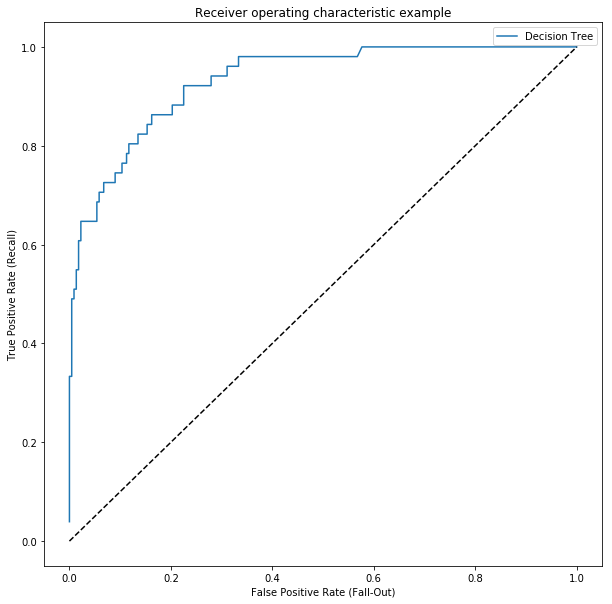

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, model4.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [152]:
auc(fpr, tpr)

0.9327857269033739